<a href="https://colab.research.google.com/github/ShindeParth31/Time-series-analysis-on-sales-data/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [42]:
from google.colab import files
uploaded = files.upload()


Saving sales_data.csv to sales_data (1).csv


In [43]:
import pandas as pd

df = pd.read_csv("sales_data.csv")
df.head()


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [51]:
if 'Sale_Date' not in df.columns:
    df = df.reset_index()

df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df = df.sort_values('Sale_Date')
df = df.groupby('Sale_Date')['Sales_Amount'].sum().reset_index()
df.set_index('Sale_Date', inplace=True)
df.ffill(inplace=True)

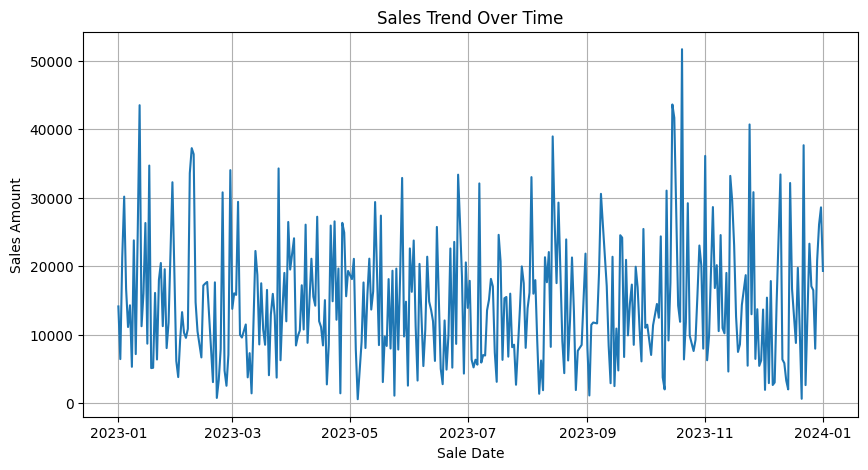

In [54]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Sales_Amount'])
plt.title("Sales Trend Over Time")
plt.xlabel("Sale Date")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.show()


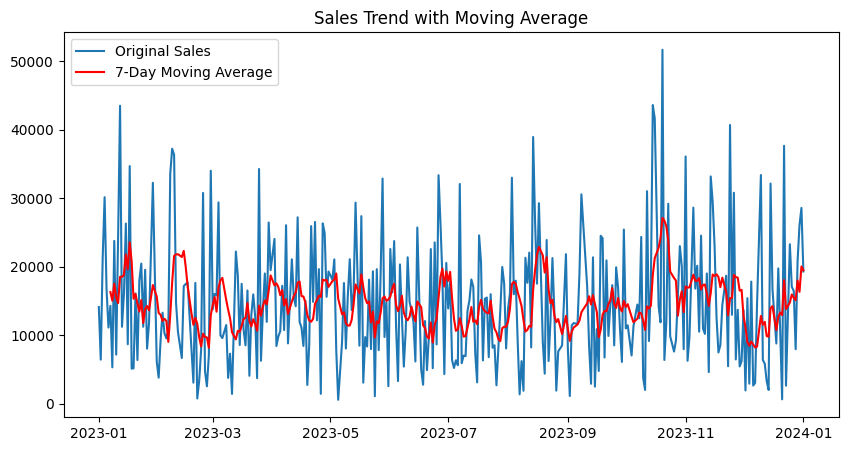

In [58]:
df['Moving_Avg'] = df['Sales_Amount'].rolling(window=7).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Sales_Amount'], label='Original Sales')
plt.plot(df['Moving_Avg'], label='7-Day Moving Average', color='red')
plt.legend()
plt.title("Sales Trend with Moving Average")
plt.show()


In [65]:
df = df.groupby('Sale_Date')['Sales_Amount'].sum()


In [59]:
train = df.iloc[:-10]
test = df.iloc[-10:]


In [76]:
train = df.iloc[:-30]
test = df.iloc[-30:]

model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

rmse = np.sqrt(mean_squared_error(test.values, forecast.values))
rmse



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

np.float64(10365.838064231411)

In [78]:
forecast = model_fit.forecast(steps=10)
forecast


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
310,14796.059807
311,15107.933668
312,14479.752732
313,15100.992754
314,14497.390571
315,15083.488621
316,14514.399823
317,15066.972555
318,14530.436575
319,15051.401221


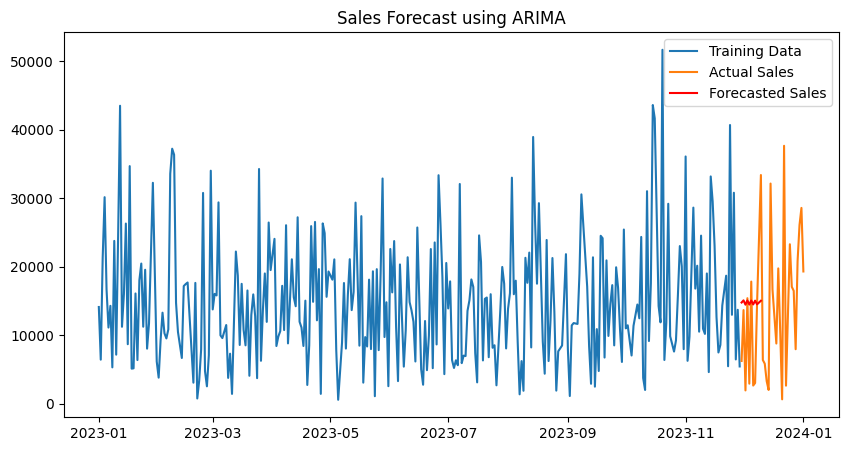

In [80]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Sales')
# Plot the forecast against the corresponding dates in the test set
plt.plot(test.index[:len(forecast)], forecast, label='Forecasted Sales', color='red')
plt.legend()
plt.title("Sales Forecast using ARIMA")
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
import numpy as np

# The 'test' variable is already a Series, so we use its values directly.
# Since 'forecast' has 10 steps, we align 'test' to match that length.
test_subset = test.iloc[:len(forecast)]

# RMSE calculation
rmse = np.sqrt(
    mean_squared_error(
        test_subset.values,
        forecast.values
    )
)

print(f"RMSE for the first {len(forecast)} days of forecast: {rmse}")

RMSE for the first 10 days of forecast: 9973.273418703015


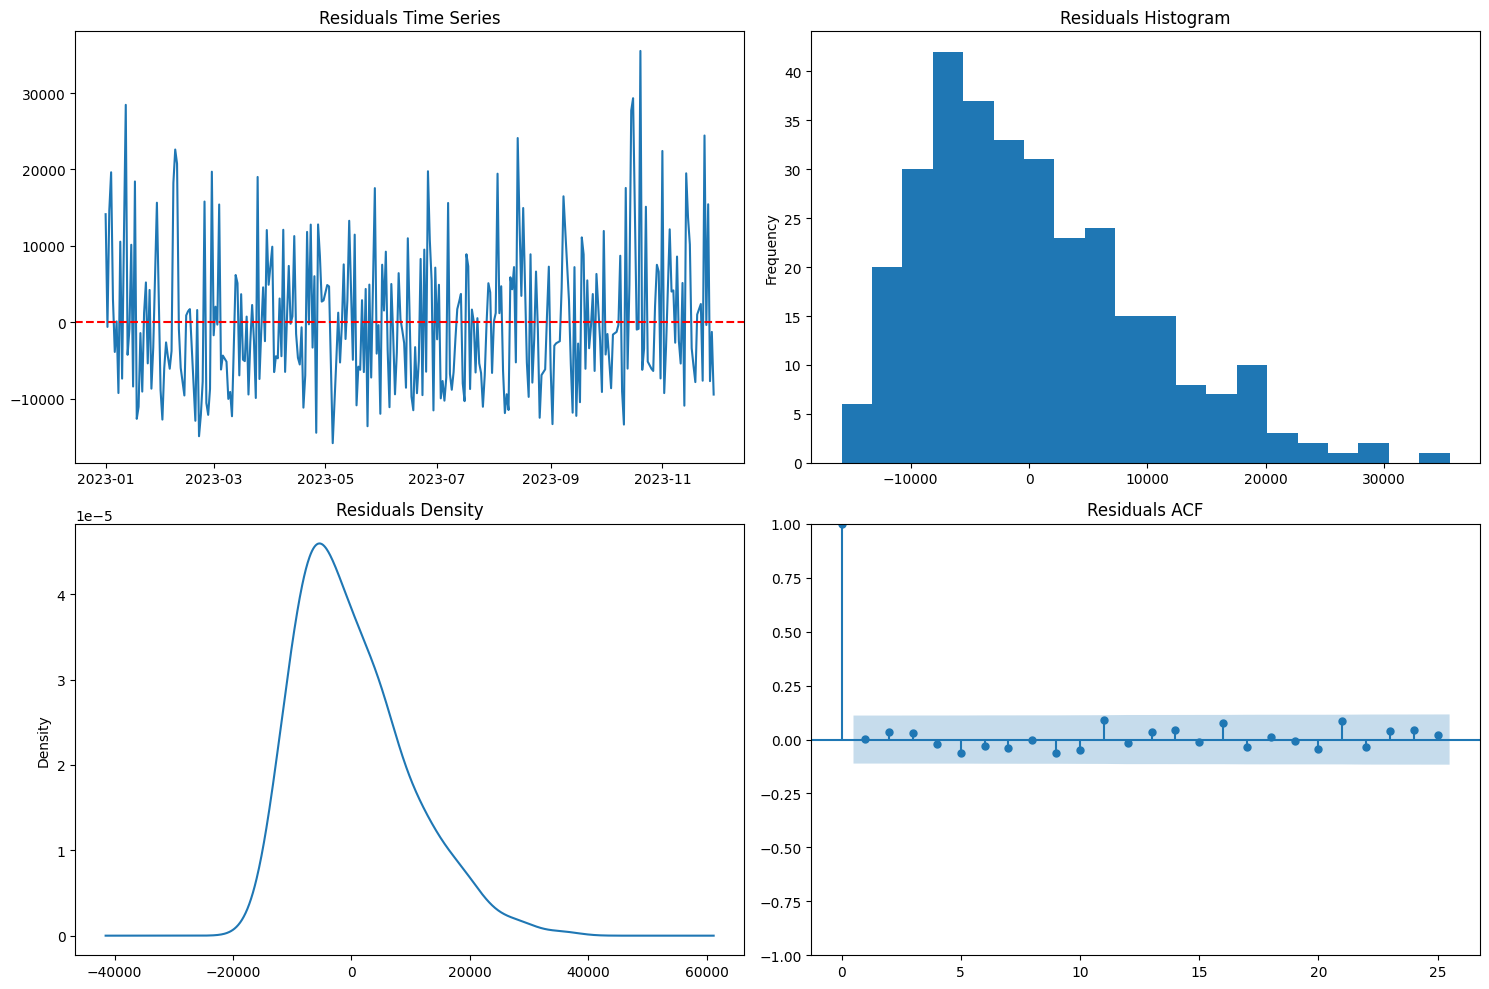

In [84]:
from statsmodels.graphics.tsaplots import plot_acf

# 1. Access residuals
residuals = model_fit.resid

# 2. Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 3. Plot residuals as time series
axes[0, 0].plot(residuals)
axes[0, 0].set_title('Residuals Time Series')
axes[0, 0].axhline(0, color='red', linestyle='--')

# 4. Histogram and Density plot
residuals.plot(kind='hist', bins=20, ax=axes[0, 1], title='Residuals Histogram')
residuals.plot(kind='kde', ax=axes[1, 0], title='Residuals Density')

# 5. ACF Plot
plot_acf(residuals, ax=axes[1, 1])
axes[1, 1].set_title('Residuals ACF')

plt.tight_layout()
plt.show()